In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
def structure(vari, cha1, cha2):
    print("4mu {0} structure: {1}".format(vari, cha1))
    print("2mu2e {0} structure: {1}".format(vari, cha2))
    
    return vari

In [3]:
samples_2mu2e = [
    '2mu2e_500GeV_5GeV_0p08mm',
    '2mu2e_500GeV_5GeV_0p8mm',
    '2mu2e_500GeV_5GeV_8p0mm',
    '2mu2e_500GeV_5GeV_40p0mm',
    '2mu2e_500GeV_5GeV_80p0mm',
]

samples_4mu = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

In [4]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v2_merged")
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, "llpNanoAOD_v2_merged")

events_2mu2e, events_4mu = {}, {}

for i in tqdm(samples_2mu2e):
    fname = fileset_2mu2e[i][0]
    print(fname)
    events_2mu2e[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().DSAMuon
    
for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().DSAMuon

  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/V2/SIDM_BsTo1DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0.root


  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0.root


In [6]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].fields)

['dxy', 'dxyErr', 'dxybs', 'dz', 'dzErr', 'eta', 'ip3d', 'jetPtRelv2', 'jetRelIso', 'mass', 'miniPFRelIso_all', 'miniPFRelIso_chg', 'pfRelIso03_all', 'pfRelIso03_chg', 'pfRelIso04_all', 'phi', 'pt', 'ptErr', 'segmentComp', 'sip3d', 'softMva', 'tkRelIso', 'tunepRelPt', 'mvaLowPt', 'mvaTTH', 'charge', 'jetIdx', 'nStations', 'nTrackerLayers', 'pdgId', 'tightCharge', 'fsrPhotonIdx', 'highPtId', 'highPurity', 'inTimeMuon', 'isGlobal', 'isPFcand', 'isStandalone', 'isTracker', 'jetNDauCharged', 'looseId', 'mediumId', 'mediumPromptId', 'miniIsoId', 'multiIsoId', 'mvaId', 'mvaLowPtId', 'pfIsoId', 'puppiIsoId', 'softId', 'softMvaId', 'tightId', 'tkIsoId', 'triggerIdLoose', 'idx', 'trkPt', 'trkPtErr', 'dzPV', 'dzPVErr', 'dxyPVTraj', 'dxyPVTrajErr', 'dxyPVSigned', 'dxyPVSignedErr', 'ip3DPVSigned', 'ip3DPVSignedErr', 'dxyBS', 'dxyBSErr', 'dzBS', 'dzBSErr', 'dxyBSTraj', 'dxyBSTrajErr', 'dxyBSSigned', 'dxyBSSignedErr', 'ip3DBSSigned', 'ip3DBSSignedErr', 'trkNumPlanes', 'trkNumHits', 'trkNumDTHits', '

# Track layers and Hit

## trkNumPlanes

4mu trkNumPlanes structure: [[3, 4, 4], [4, 4, 0, 4, 1, 1], [3, 3, 2, ... 4, 3], [4, 4, 4, 3, 1], [2, 4, 4, 3]]
2mu2e trkNumPlanes structure: [[4, 3, 0, 3, 3], [4, 4], [3, 2, 0, 4], [1, ... [4, 4], [3, 3], [2, 2], [4, 4, 1]]
4mu trkNumPlanes structure: [[4, 4, 4, 3, 4], [0, 4, 4, 3, 3], [0, 4, ... [4, 4, 2, 3, 4, 1, 0, 1], [3, 2, 3]]
2mu2e trkNumPlanes structure: [[3], [3, 2, 3, 3], [4, 3, 0, 4, 4], [3, ... [4, 4, 4], [0, 3, 3, 3, 3, 1], [4, 3]]
4mu trkNumPlanes structure: [[4, 4, 4, 4, 4, 4, 2, 3, 2], [4, 3, 4, 4, ... [4, 3, 1, 4, 4], [4, 4, 3, 3, 4, 4]]
2mu2e trkNumPlanes structure: [[2, 3], [2, 2], [3, 4], [3], [4, 0, 4, ... 4], [4, 4, 1], [2, 3], [4, 3, 4, 3, 1]]
4mu trkNumPlanes structure: [[4, 4, 3, 1], [3, 3, 4], [4, 4, 3], [0, ... [4], [0, 3, 4, 4, 3, 4, 3], [3, 3, 4]]
2mu2e trkNumPlanes structure: [[3, 4, 1, 2, 4], [4, 1, 4], [4, 0, 3], ... [4, 0, 3, 4, 1, 1], [4, 4], [4, 2]]
4mu trkNumPlanes structure: [[2, 4, 3], [3, 3, 2, 0, 1], [4, 2, 0, 2, ... 3, 4], [4, 3, 3, 3, 4], [0, 

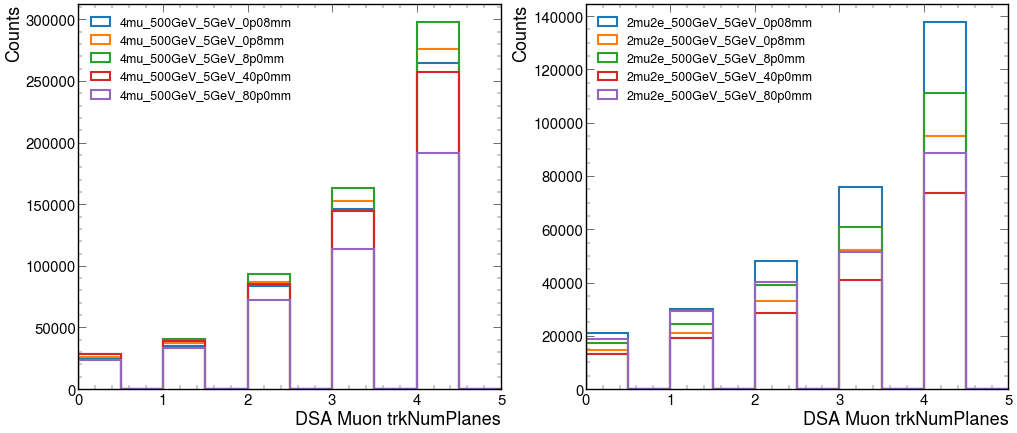

In [8]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("trkNumPlanes", events_4mu[i_4mu].trkNumPlanes, events_2mu2e[i_2mu].trkNumPlanes)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].trkNumPlanes), range=(0,5), alpha=1, bins=10, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].trkNumPlanes), range=(0,5), alpha=1, bins=10, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,5)
ax[1].set_xlim(0,5)
ax[0].set_xlabel('DSA Muon trkNumPlanes')
ax[1].set_xlabel('DSA Muon trkNumPlanes')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
plt.savefig("../Plots/V2/DSA_MUON/Track_and_hits/trkNumPlanes.png", bbox_inches="tight")

## trkNumHits

4mu trkNumHits structure: [[25, 33, 26], [43, 30, 0, 43, 13, 9], ... [49, 21, 25, 36, 9], [8, 49, 48, 40]]
2mu2e trkNumHits structure: [[24, 16, 0, 20, 32], [49, 37], [21, 27, 0, ... [33, 31], [34, 21], [24, 24, 10]]
4mu trkNumHits structure: [[26, 15, 21, 26, 36], [0, 49, 45, 22, 36, ... 13, 21, 24, 11, 0, 7], [14, 27, 26]]
2mu2e trkNumHits structure: [[23], [12, 6, 16, 27], [50, 21, 0, 23, ... 36], [0, 18, 17, 27, 26, 14], [39, 34]]
4mu trkNumHits structure: [[24, 21, 20, 22, 24, 21, 7, 34, 22], [49, ... 11, 49, 31], [24, 24, 18, 18, 46, 47]]
2mu2e trkNumHits structure: [[10, 34], [32, 33], [28, 48], [27], ... 36, 32, 9], [12, 24], [21, 23, 40, 34, 11]]
4mu trkNumHits structure: [[17, 39, 23, 8], [29, 20, 39], [20, ... 0, 18, 28, 25, 34, 47, 24], [18, 17, 22]]
2mu2e trkNumHits structure: [[18, 35, 11, 22, 35], [50, 5, 46], [31, ... 0, 16, 26, 10, 11], [24, 20], [25, 26]]
4mu trkNumHits structure: [[12, 39, 24], [15, 18, 9, 0, 11], [47, ... [21, 21, 21, 27, 21], [0, 20, 13, 45]]
2mu2e

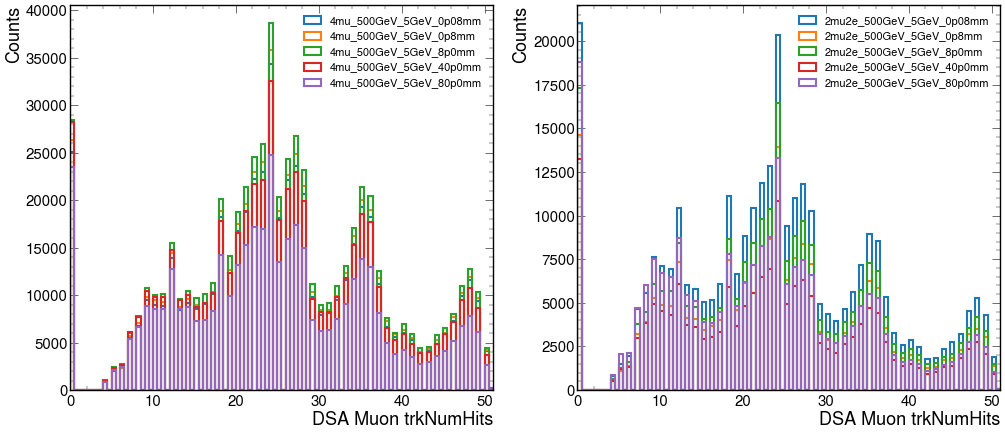

In [10]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("trkNumHits", events_4mu[i_4mu].trkNumHits, events_2mu2e[i_2mu].trkNumHits)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].trkNumHits), range=(0,51), alpha=1, bins=102, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].trkNumHits), range=(0,51), alpha=1, bins=102, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,51)
ax[1].set_xlim(0,51)
ax[0].set_xlabel('DSA Muon trkNumHits')
ax[1].set_xlabel('DSA Muon trkNumHits')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
plt.savefig("../Plots/V2/DSA_MUON/Track_and_hits/trkNumHits.png", bbox_inches="tight")

## trkNumDTHits

4mu trkNumDTHits structure: [[21, 28, 20], [0, 0, 0, 0, 11, 8], [28, ... 28], [44, 0, 0, 32, 8], [0, 43, 42, 36]]
2mu2e trkNumDTHits structure: [[0, 0, 0, 17, 29], [43, 34], [0, 16, 0, 23, ... 28], [30, 28], [23, 12], [0, 0, 9]]
4mu trkNumDTHits structure: [[0, 0, 0, 23, 31], [0, 44, 39, 18, 31], ... 0, 0, 0, 0, 0, 9, 0, 6], [10, 23, 22]]
2mu2e trkNumDTHits structure: [[19], [0, 0, 0, 22], [44, 0, 0, 0, 41, ... 33, 30], [0, 0, 0, 22, 22, 12], [35, 31]]
4mu trkNumDTHits structure: [[0, 0, 0, 0, 0, 0, 0, 31, 20], [44, 0, ... 0, 35, 9, 44, 28], [0, 0, 0, 0, 43, 43]]
2mu2e trkNumDTHits structure: [[0, 30], [23, 23], [24, 42], [22], [20, ... [32, 27, 8], [0, 0], [0, 0, 35, 31, 9]]
4mu trkNumDTHits structure: [[0, 34, 19, 7], [24, 16, 34], [0, 42, 19, ... [0, 0, 0, 0, 30, 41, 20], [0, 0, 0]]
2mu2e trkNumDTHits structure: [[0, 29, 9, 12, 29], [44, 0, 41], [0, 0, ... 0, 0, 11, 21, 9, 10], [0, 0], [20, 23]]
4mu trkNumDTHits structure: [[0, 34, 12], [0, 0, 0, 0, 10], [42, 0, ... 30], [0, 18, 18,

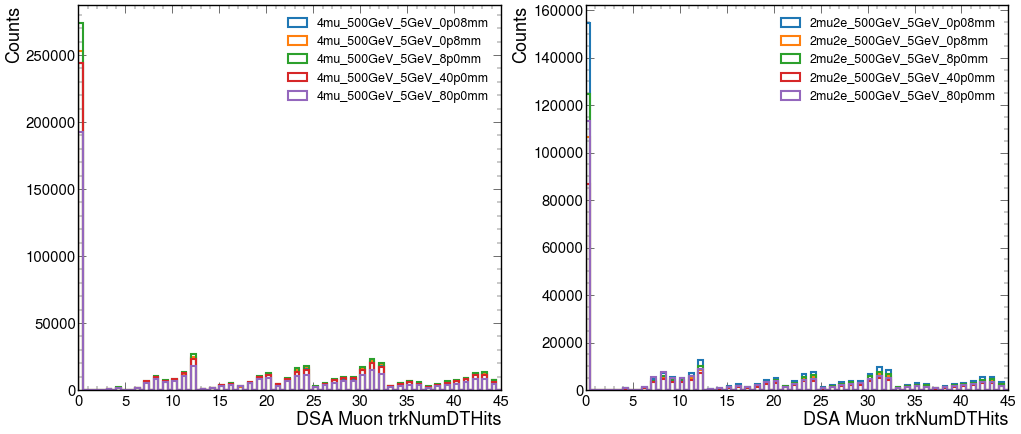

In [19]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("trkNumDTHits", events_4mu[i_4mu].trkNumDTHits, events_2mu2e[i_2mu].trkNumDTHits)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].trkNumDTHits), range=(0,45), alpha=1, bins=90, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].trkNumDTHits), range=(0,45), alpha=1, bins=90, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,45)
ax[1].set_xlim(0,45)
ax[0].set_xlabel('DSA Muon trkNumDTHits')
ax[1].set_xlabel('DSA Muon trkNumDTHits')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
plt.savefig("../Plots/V2/DSA_MUON/Track_and_hits/trkNumDTHits.png", bbox_inches="tight")

## trkNumCSCHits

4mu trkNumCSCHits structure: [[0, 0, 0], [42, 28, 0, 40, 0, 0], [0, 23, ... 0], [0, 18, 21, 0, 0], [8, 0, 0, 0]]
2mu2e trkNumCSCHits structure: [[24, 16, 0, 0, 0], [0, 0], [18, 6, 0, 0], ... [0, 0], [0, 0], [6, 6], [20, 20, 0]]
4mu trkNumCSCHits structure: [[24, 11, 18, 0, 0], [0, 0, 0, 0, 0], ... 20, 22, 12, 18, 24, 0, 0, 0], [0, 0, 0]]
2mu2e trkNumCSCHits structure: [[0], [6, 4, 16, 0], [0, 21, 0, 23, 0], ... 24, 0, 0], [0, 18, 16, 0, 0, 0], [0, 0]]
4mu trkNumCSCHits structure: [[23, 21, 20, 18, 24, 21, 6, 0, 0], [0, 14, ... 0, 0, 0, 0], [24, 24, 18, 18, 0, 0]]
2mu2e trkNumCSCHits structure: [[10, 0], [5, 6], [0, 0], [0], [0, 0, ... [0, 0, 0], [12, 21], [21, 22, 0, 0, 0]]
4mu trkNumCSCHits structure: [[15, 0, 0, 0], [0, 0, 0], [16, 0, 0], ... [0, 18, 24, 22, 0, 0, 0], [18, 17, 22]]
2mu2e trkNumCSCHits structure: [[18, 0, 0, 6, 0], [0, 4, 0], [28, 0, 21], ... [15, 0, 0, 0, 0, 0], [21, 18], [0, 0]]
4mu trkNumCSCHits structure: [[11, 0, 9], [15, 18, 9, 0, 0], [0, 8, 0, ... 0], [21, 0, 0

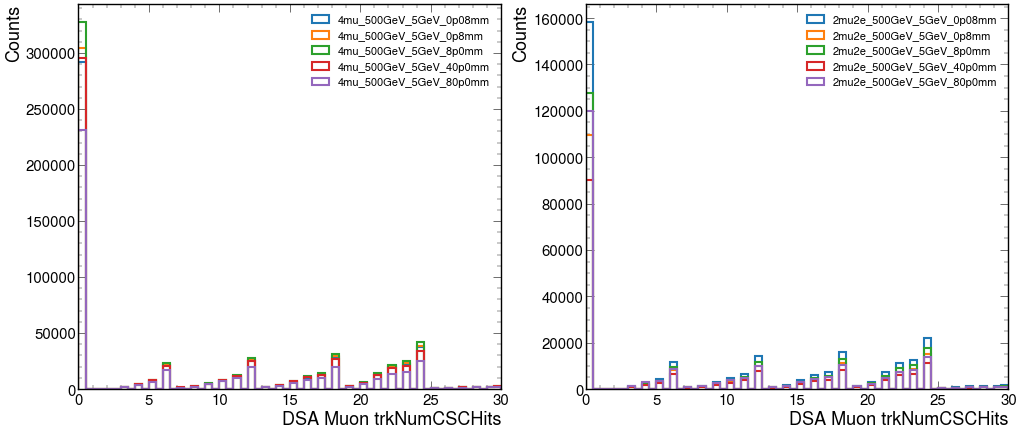

In [20]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("trkNumCSCHits", events_4mu[i_4mu].trkNumCSCHits, events_2mu2e[i_2mu].trkNumCSCHits)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].trkNumCSCHits), range=(0,30), alpha=1, bins=60, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].trkNumCSCHits), range=(0,30), alpha=1, bins=60, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,30)
ax[1].set_xlim(0,30)
ax[0].set_xlabel('DSA Muon trkNumCSCHits')
ax[1].set_xlabel('DSA Muon trkNumCSCHits')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
plt.savefig("../Plots/V2/DSA_MUON/Track_and_hits/trkNumCSCHits.png", bbox_inches="tight")

## nSegments

4mu nSegments structure: [[2, 3, 2], [7, 5, 0, 7, 1, 1], [3, 4, 1, ... 4, 3], [4, 3, 4, 3, 1], [2, 4, 4, 3]]
2mu2e nSegments structure: [[4, 3, 0, 2, 3], [4, 4], [3, 3, 0, 3], [1, ... [4, 3], [3, 3], [3, 2], [4, 4, 1]]
4mu nSegments structure: [[4, 2, 3, 3, 3], [0, 4, 4, 2, 3], [0, 4, ... [4, 4, 2, 3, 4, 1, 0, 1], [1, 2, 2]]
2mu2e nSegments structure: [[2], [1, 1, 3, 2], [4, 4, 0, 4, 4], [4, ... [4, 4, 3], [0, 3, 3, 2, 2, 1], [3, 3]]
4mu nSegments structure: [[4, 4, 4, 3, 4, 4, 1, 3, 2], [4, 3, 4, 4, ... [4, 3, 1, 4, 3], [4, 4, 3, 3, 4, 4]]
2mu2e nSegments structure: [[2, 3], [3, 3], [2, 4], [2], [2, 0, 4, ... 3], [4, 3, 1], [2, 4], [4, 4, 4, 3, 1]]
4mu nSegments structure: [[3, 4, 2, 1], [3, 2, 3], [3, 4, 2], [0, ... [4], [0, 3, 4, 4, 3, 4, 2], [3, 3, 4]]
2mu2e nSegments structure: [[3, 3, 1, 2, 3], [4, 1, 4], [5, 0, 4], ... [3, 0, 1, 3, 1, 1], [4, 3], [2, 2]]
4mu nSegments structure: [[2, 4, 3], [3, 3, 2, 0, 1], [4, 2, 0, 2, ... 2, 3], [4, 2, 2, 2, 2], [0, 3, 2, 7]]
2mu2e nSegments s

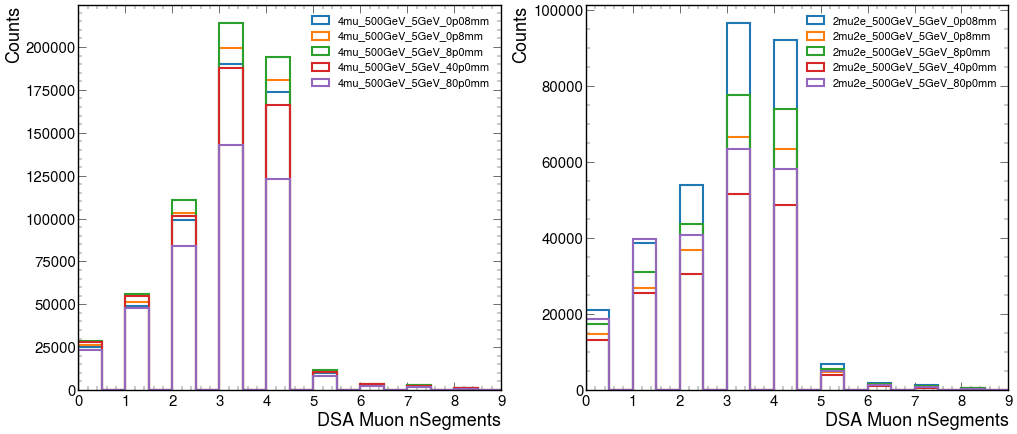

In [21]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("nSegments", events_4mu[i_4mu].nSegments, events_2mu2e[i_2mu].nSegments)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].nSegments), range=(0,9), alpha=1, bins=18, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].nSegments), range=(0,9), alpha=1, bins=18, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,9)
ax[1].set_xlim(0,9)
ax[0].set_xlabel('DSA Muon nSegments')
ax[1].set_xlabel('DSA Muon nSegments')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
plt.savefig("../Plots/V2/DSA_MUON/Track_and_hits/nSegments.png", bbox_inches="tight")

## nDTSegments

4mu nDTSegments structure: [[2, 3, 2], [0, 0, 0, 0, 1, 1], [3, 0, 0, ... 4, 3], [4, 0, 0, 3, 1], [0, 4, 4, 3]]
2mu2e nDTSegments structure: [[0, 0, 0, 2, 3], [4, 4], [0, 2, 0, 3], [1, ... [4, 3], [3, 3], [2, 1], [0, 0, 1]]
4mu nDTSegments structure: [[0, 0, 0, 3, 3], [0, 4, 4, 2, 3], [0, 0, ... [0, 0, 0, 0, 0, 1, 0, 1], [1, 2, 2]]
2mu2e nDTSegments structure: [[2], [0, 0, 0, 2], [4, 0, 0, 0, 4], [1, ... [0, 4, 3], [0, 0, 0, 2, 2, 1], [3, 3]]
4mu nDTSegments structure: [[0, 0, 0, 0, 0, 0, 0, 3, 2], [4, 0, 4, 4, ... [0, 3, 1, 4, 3], [0, 0, 0, 0, 4, 4]]
2mu2e nDTSegments structure: [[0, 3], [2, 2], [2, 4], [2], [2, 0, 4, ... 0], [4, 3, 1], [0, 0], [0, 0, 4, 3, 1]]
4mu nDTSegments structure: [[0, 4, 2, 1], [3, 2, 3], [0, 4, 2], [0, ... [4], [0, 0, 0, 0, 3, 4, 2], [0, 0, 0]]
2mu2e nDTSegments structure: [[0, 3, 1, 1, 3], [4, 0, 4], [0, 0, 0], ... [0, 0, 1, 3, 1, 1], [0, 0], [2, 2]]
4mu nDTSegments structure: [[0, 4, 1], [0, 0, 0, 0, 1], [4, 0, 0, 2, ... 2, 3], [0, 2, 2, 2, 2], [0, 0, 0, 0]]

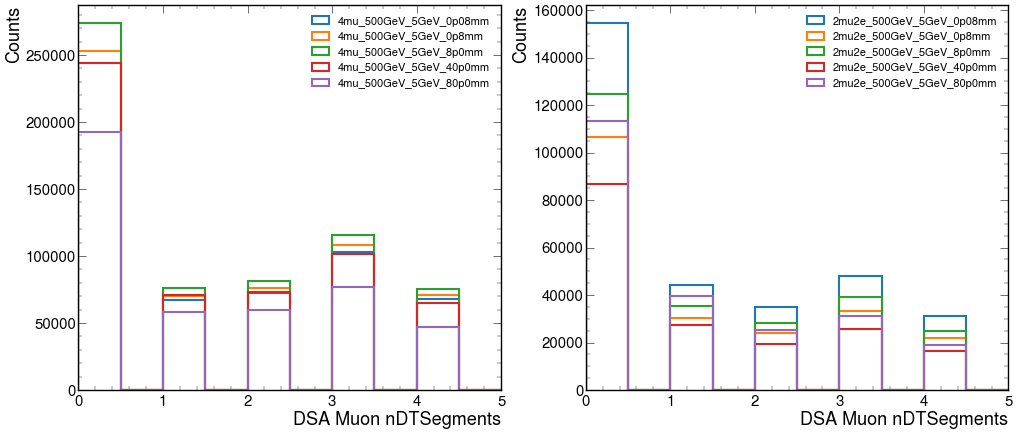

In [23]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("nDTSegments", events_4mu[i_4mu].nDTSegments, events_2mu2e[i_2mu].nDTSegments)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].nDTSegments), range=(0,5), alpha=1, bins=10, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].nDTSegments), range=(0,5), alpha=1, bins=10, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,5)
ax[1].set_xlim(0,5)
ax[0].set_xlabel('DSA Muon nDTSegments')
ax[1].set_xlabel('DSA Muon nDTSegments')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
plt.savefig("../Plots/V2/DSA_MUON/Track_and_hits/nDTSegments.png", bbox_inches="tight")

## nCSCSegments

4mu nCSCSegments structure: [[0, 0, 0], [7, 5, 0, 7, 0, 0], [0, 4, 1, ... 0, 0], [0, 3, 4, 0, 0], [2, 0, 0, 0]]
2mu2e nCSCSegments structure: [[4, 3, 0, 0, 0], [0, 0], [3, 1, 0, 0], [0, ... [0, 0], [0, 0], [1, 1], [4, 4, 0]]
4mu nCSCSegments structure: [[4, 2, 3, 0, 0], [0, 0, 0, 0, 0], [0, 4, ... [4, 4, 2, 3, 4, 0, 0, 0], [0, 0, 0]]
2mu2e nCSCSegments structure: [[0], [1, 1, 3, 0], [0, 4, 0, 4, 0], [3, ... [4, 0, 0], [0, 3, 3, 0, 0, 0], [0, 0]]
4mu nCSCSegments structure: [[4, 4, 4, 3, 4, 4, 1, 0, 0], [0, 3, 0, 0, ... [4, 0, 0, 0, 0], [4, 4, 3, 3, 0, 0]]
2mu2e nCSCSegments structure: [[2, 0], [1, 1], [0, 0], [0], [0, 0, 0, ... 3], [0, 0, 0], [2, 4], [4, 4, 0, 0, 0]]
4mu nCSCSegments structure: [[3, 0, 0, 0], [0, 0, 0], [3, 0, 0], [0, ... [0], [0, 3, 4, 4, 0, 0, 0], [3, 3, 4]]
2mu2e nCSCSegments structure: [[3, 0, 0, 1, 0], [0, 1, 0], [5, 0, 4], ... [3, 0, 0, 0, 0, 0], [4, 3], [0, 0]]
4mu nCSCSegments structure: [[2, 0, 2], [3, 3, 2, 0, 0], [0, 2, 0, 0, ... 0, 0], [4, 0, 0, 0, 0], [0, 

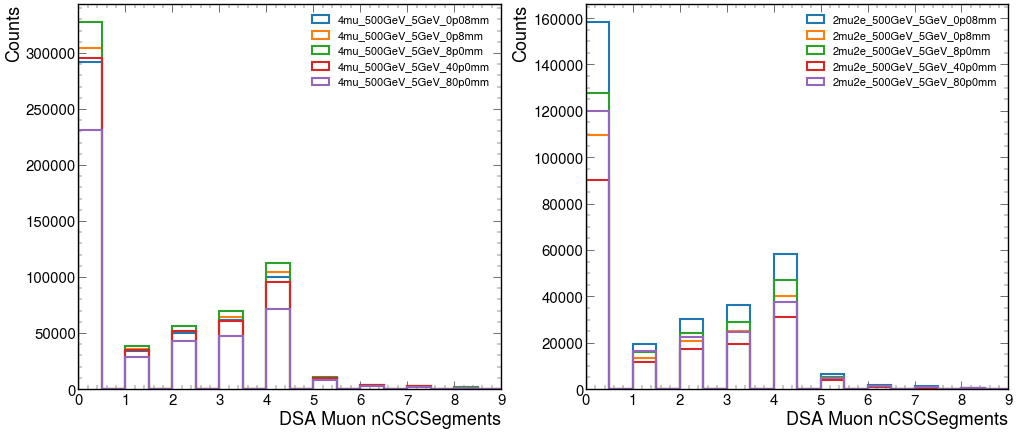

In [26]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("nCSCSegments", events_4mu[i_4mu].nCSCSegments, events_2mu2e[i_2mu].nCSCSegments)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].nCSCSegments), range=(0,9), alpha=1, bins=18, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].nCSCSegments), range=(0,9), alpha=1, bins=18, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,9)
ax[1].set_xlim(0,9)
ax[0].set_xlabel('DSA Muon nCSCSegments')
ax[1].set_xlabel('DSA Muon nCSCSegments')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
plt.savefig("../Plots/V2/DSA_MUON/Track_and_hits/nCSCSegments.png", bbox_inches="tight")